# Model Testing & Validation

In [1]:
import tensorflow
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2025-04-07 03:55:10.897265: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 03:55:10.900327: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 03:55:10.908637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743998110.922479  156615 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743998110.926780  156615 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743998110.938083  156615 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Load the model and dataset:

In [2]:
model = keras.models.load_model('trained_model.keras')
model_leaky = keras.models.load_model('trained_model_leaky.keras')
model_big = keras.models.load_model('trained_model_big.keras')
data_frame = pd.read_csv('testing_data.csv')

2025-04-07 03:55:13.730214: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.22 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,768 (10.82 KB)

In [4]:
model_leaky.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.22 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,768 (10.82 KB)

In [5]:
model_big.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,811 (135.98 KB)

 Trainable params: 11,603 (45.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,208 (90.66 KB)

In [6]:
x_test = data_frame.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).to_numpy()
y_test = data_frame[["wind_spd_kmh", "gust_kmh", "wind_dir_deg"]].to_numpy()

In [11]:
loss, mae = model.evaluate(x_test, y_test, verbose=0)
loss_leaky, mae_leaky = model_leaky.evaluate(x_test, y_test, verbose=0)
loss_big, mae_big = model_big.evaluate(x_test, y_test, verbose=0)

results = pd.DataFrame({
    "Model": ["Base Model", "Leaky Model", "Big Model"],
    "Loss": [loss, loss_leaky, loss_big],
    "MAE": [mae, mae_leaky, mae_big]
})
print(results)

         Model      Loss       MAE
0   Base Model  0.014559  0.056987
1  Leaky Model  0.014478  0.053734
2    Big Model  0.014289  0.053140


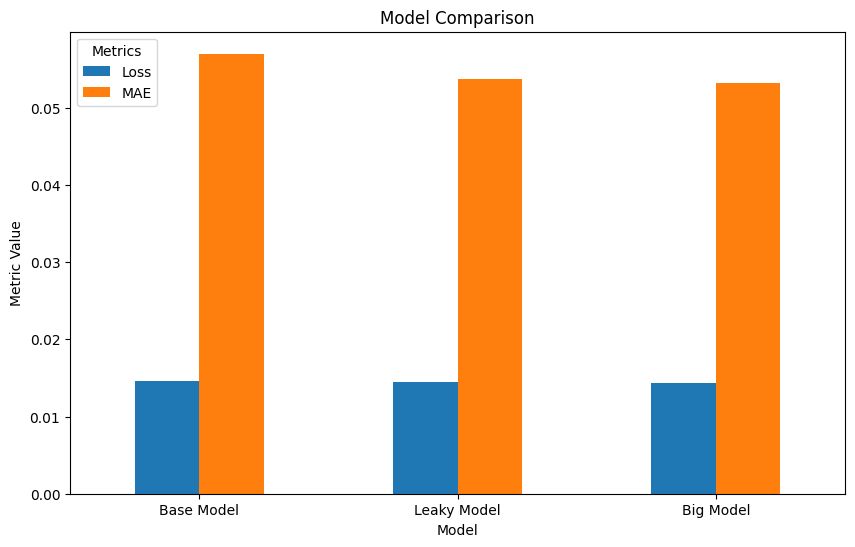

In [12]:
# Visualize the results
results.set_index("Model", inplace=True)
results.plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

In [ ]:
# Efficiency comparison


